(array([ 1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  3.,  2.,  0.,
         3.,  4.,  0.,  4.,  3.,  6.,  3.,  4.,  5.,  6.,  4.,  8.,  6.,
         9., 10., 11., 14.,  9., 11.,  6., 14., 19., 14., 16., 22., 16.,
        22., 17., 19., 21., 25., 22., 20., 19., 27., 24., 22., 26., 22.,
        23., 20., 20., 23., 21., 35., 23., 26., 17., 21., 16., 19., 18.,
        15., 23., 17., 20., 16., 11., 12.,  8.,  7.,  9.,  5.,  8.,  7.,
         8.,  5.,  0.,  1.,  4.,  1.,  3.,  4.,  4.,  0.,  0.,  1.,  3.,
         1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([0.18810644, 0.1942089 , 0.20031136, 0.20641382, 0.21251628,
        0.21861874, 0.22472121, 0.23082367, 0.23692613, 0.24302859,
        0.24913105, 0.25523351, 0.26133597, 0.26743843, 0.2735409 ,
        0.27964336, 0.28574582, 0.29184828, 0.29795074, 0.3040532 ,
        0.31015566, 0.31625812, 0.32236059, 0.32846305, 0.33456551,
        0.34066797, 0.34677043, 0.35287289, 0.35897535, 0.36507781,
        0.37118028, 0.3772

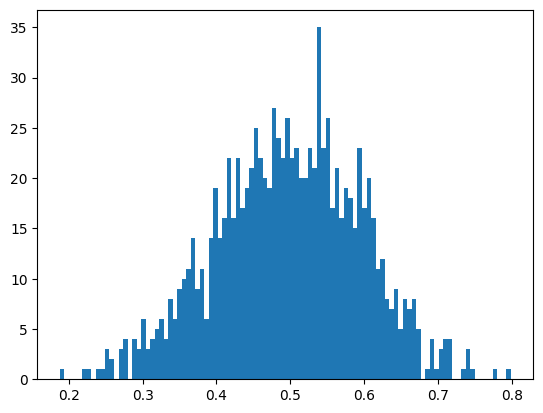

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Number of agents
N = 1000

# Wealth
wealth_arr = abs(np.random.normal(0.5, 0.1, N))
plt.hist(wealth_arr, bins=100)  

(array([62., 51., 48., 48., 52., 52., 41., 45., 29., 34., 29., 33., 30.,
        30., 25., 24., 20., 27., 15., 14., 14., 11., 15., 17., 13., 18.,
        10., 17.,  9.,  8.,  8.,  6., 12., 13.,  7.,  8.,  5.,  5.,  2.,
         6.,  5.,  4.,  7.,  6.,  1.,  3.,  2.,  8.,  3.,  2.,  2.,  1.,
         4.,  4.,  2.,  2.,  5.,  1.,  3.,  1.,  0.,  0.,  1.,  1.,  0.,
         3.,  1.,  1.,  0.,  0.,  0.,  0.,  2.,  2.,  0.,  0.,  0.,  1.,
         0.,  0.,  2.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  2.]),
 array([1.00007354e-04, 2.97801999e-02, 5.94603924e-02, 8.91405849e-02,
        1.18820777e-01, 1.48500970e-01, 1.78181162e-01, 2.07861355e-01,
        2.37541547e-01, 2.67221740e-01, 2.96901932e-01, 3.26582125e-01,
        3.56262317e-01, 3.85942510e-01, 4.15622703e-01, 4.45302895e-01,
        4.74983088e-01, 5.04663280e-01, 5.34343473e-01, 5.64023665e-01,
        5.93703858e-01, 6.23384050e-01, 6.53064243e-01, 6.82744435e-01,
  

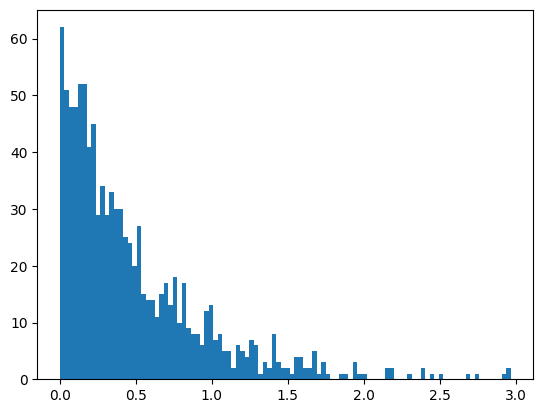

In [3]:
import random
N = 1000
alpha = 1
beta = 0.5

wealth_arr = np.array([random.gammavariate(alpha, beta) for i in range(N)])
plt.hist(wealth_arr, bins=100)

In [4]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

gini(wealth_arr)

np.float64(0.49892540635130156)

In [5]:
X = wealth_arr
X_lorenz = X.cumsum() / X.sum()
X_lorenz = np.insert(X_lorenz, 0, 0)
X_lorenz[0], X_lorenz[-1]


(np.float64(0.0), np.float64(1.0000000000000002))

Text(0.5, 1.0, 'Lorenz curve')

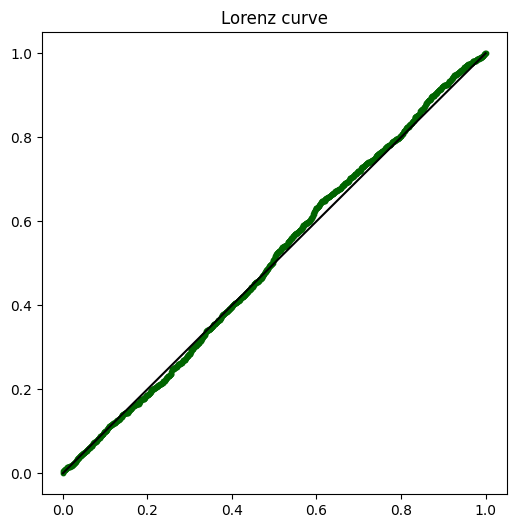

In [6]:
fig, ax = plt.subplots(figsize=[6,6])

ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, color='darkgreen', s=10)
ax.plot([0,1], [0,1], color='k')
ax.set_title('Lorenz curve')
 

In [10]:
import sys
sys.path.append('../')

from crime_model_03 import CrimeModel

model = CrimeModel(N, 0.8, wealth_arr)

while model.schedule.steps < 100:
    model.step()


TypeError: CrimeModel.__init__() missing 1 required positional argument: 'fraction_stolen'

In [ ]:
model.datacollector.get_agent_vars_dataframe()

Criminal    Wealth
Step AgentID                    
0    0           False  0.625538
     1           False  0.396511
     2           False  0.085835
     3           False  0.464072
     4           False  0.089062
...                ...       ...
99   883         False  0.532911
     632          True  0.685463
     858          True  0.532789
     597          True  0.791261
     234         False  0.607151

[100000 rows x 2 columns]

In [ ]:
model.datacollector.get_model_vars_dataframe()

,Crime rate
0,0.000
1,0.088
2,0.175
3,0.225
4,0.271
...,...
95,0.525
96,0.526
97,0.526
98,0.526


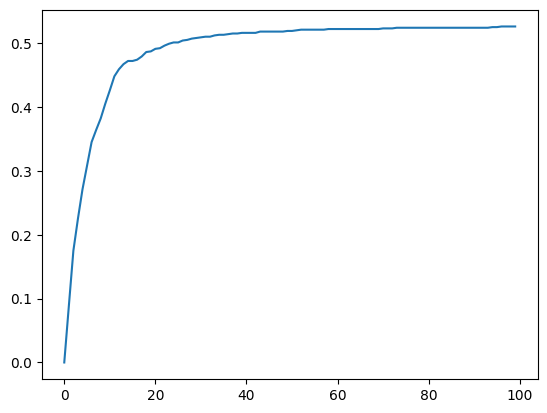

In [ ]:
plt.plot(model.datacollector.get_model_vars_dataframe())

In [ ]:
df_explo = model.datacollector.get_agent_vars_dataframe().reset_index()
df_explo

,Step,AgentID,Criminal,Wealth
0,0,0,False,0.625538
1,0,1,False,0.396511
2,0,2,False,0.085835
3,0,3,False,0.464072
4,0,4,False,0.089062
...,...,...,...,...
99995,99,883,False,0.532911
99996,99,632,True,0.685463
99997,99,858,True,0.532789
99998,99,597,True,0.791261


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 

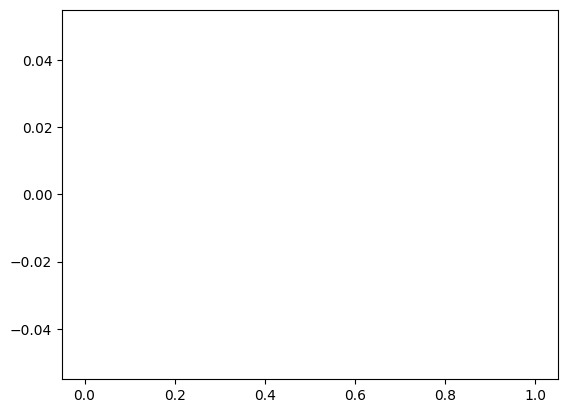

In [ ]:
plt.hist(df_explo.loc[df_explo.Step == 999, 'Wealth'], bins=100)